In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
def grade_cluster(df):
    national_language_criteria = (df['Subiect ea'].str.find("Limba română") != -1) & (df['NOTA_EA'] >= 7)
    math_criteria = (df['Subiect ec'].str.find("Mate") != -1) & (df['NOTA_EC'] >= 8.5)
    history_criteria = (df['Subiect ec'].str.find("Istorie") != -1) & (df['NOTA_EC'] >= 8)
    biology_criteria = ((df['Subiect ed'].str.find("Biologie") != -1) | (df['Subiect ed'].str.find("Anatomie") != -1)) & (df['NOTA_ED'] >= 9)
    chemistry_criteria = (df['Subiect ed'].str.find("Chimie") != -1) & (df['NOTA_ED'] >= 8)
    physics_criteria = (df['Subiect ed'].str.find("Fizică") != -1) & (df['NOTA_ED'] >= 8.5)
    economy_criteria = (df['Subiect ed'].str.find("Economie") != -1) & (df['NOTA_ED'] >= 8)
    logic_criteria = (df['Subiect ed'].str.find("Logică") != -1) & (df['NOTA_ED'] >= 8)
    psychology_criteria = (df['Subiect ed'].str.find("Psihologie") != -1) & (df['NOTA_ED'] >= 8)
    informatics_criteria = (df['Subiect ed'].str.find("Informatică") != -1) & (df['NOTA_ED'] >= 8)
 
    # engineering
    engineering = math_criteria & (physics_criteria | chemistry_criteria)
 
    # computer science
    computer_science = math_criteria & informatics_criteria
 
    # social_studies
    social_studies = national_language_criteria & (logic_criteria | psychology_criteria)
 
    # law
    law = national_language_criteria & history_criteria
 
    # medical school
    medicine = biology_criteria | chemistry_criteria
 
    # economics
    economics = economy_criteria | math_criteria
   
    return engineering, computer_science, social_studies, law, medicine, economics

In [40]:
def predict_grades(student_df):
    student_encoded = pd.DataFrame(one_hot_encoder.transform(student_df[categorical_columns]))
    student_df = pd.concat([student_df.drop(categorical_columns, axis=1), student_encoded], axis=1)
    student_df.columns = student_df.columns.astype(str)
 
    prediction = regressor.predict(student_df)

    return prediction

In [41]:
bac_results = pd.read_csv('bac_date_2023.csv', on_bad_lines='skip')
sirues_codes = pd.read_csv('coduri-sirues.csv', on_bad_lines='skip')

bac_results = bac_results[bac_results['STATUS'] == 'Promovat']

 
sirues_codes = sirues_codes[sirues_codes['Cod SIRUES'].isin([np.inf, -np.inf, np.nan]) == False]
sirues_codes['Cod SIRUES'] = sirues_codes['Cod SIRUES'].astype(int)

columns_to_drop = ['Cod unic candidat', 'Forma de învățământ', 'Clasa', 'Subiect eb','Limba modernă','Promoție', 'Unitate (SIIIR)',
                   'NOTE_RECUN_A','NOTE_RECUN_B','NOTE_RECUN_C','NOTE_RECUN_D','NOTE_RECUN_EA','NOTE_RECUN_EB','NOTE_RECUN_EC','NOTE_RECUN_ED','STATUS_A',
                   'STATUS_B','STATUS_C','STATUS_D','STATUS_EA','STATUS_EB','STATUS_EC','STATUS_ED','ITA','SCRIS_ITC','SCRIS_PMS','ORAL_PMO','ORAL_IO',
                   'CONTESTATIE_EA','NOTA_CONTESTATIE_EA','CONTESTATIE_EB','NOTA_CONTESTATIE_EB','CONTESTATIE_EC','NOTA_CONTESTATIE_EC','CONTESTATIE_ED',
                   'NOTA_CONTESTATIE_ED','PUNCTAJ DIGITALE', 'STATUS', 'NOTA_EB']
bac_results = bac_results.drop(columns=columns_to_drop)
 
 
columns_to_drop = ['Nr.', 'Fel unitate', 'Tip unitate', 'Categorie unitate', 'Limba de predare', 'Denumire', 'Forma de învăţământ']
sirues_codes = sirues_codes.drop(columns=columns_to_drop)
 
 
# match students to their graduated school
merged_data = pd.merge(bac_results, sirues_codes, left_on='Unitate (SIRUES)', right_on='Cod SIRUES', how='inner')
merged_data = merged_data.drop('Unitate (SIRUES)', axis=1)

In [42]:
X = merged_data.drop('NOTA_EA', axis=1).drop('NOTA_EC', axis=1).drop('NOTA_ED', axis=1).drop('Medie', axis=1)  # 'target_column' is the column you want to predict
y = merged_data[['NOTA_EA', 'NOTA_EC', 'NOTA_ED']]
 
 
categorical_columns = ['Sex', 'Specializare', 'Profil', 'Fileira', 'Mediu candidat', 'Judeţ', 'Subiect ea', 'Subiect ec', 'Subiect ed']
one_hot_encoder = OneHotEncoder(sparse_output=False)
X_encoded = pd.DataFrame(one_hot_encoder.fit_transform(X[categorical_columns]))
X = pd.concat([X.drop(categorical_columns, axis=1), X_encoded], axis=1)
X.columns = X.columns.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
 
# Create a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Make predictions on the testing data
y_pred = regressor.predict(X_test)
 
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
 
print(f"MSE:", {mse})

MSE: {1.3312215317035245}


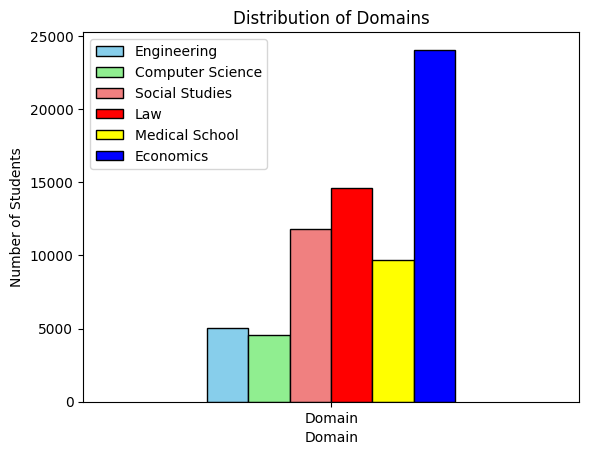

In [44]:
engineering, computer_science, social_studies, law, medicine, economics = grade_cluster(merged_data)

# Plot the distribution of categories
categories_df = pd.DataFrame({
    'Engineering': engineering.sum(),
    'Computer Science': computer_science.sum(),
    'Social Studies': social_studies.sum(),
    'Law': law.sum(),
    'Medical School': medicine.sum(),
    'Economics': economics.sum(),
}, index=['Domain'])
categories_df.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'red', 'yellow', 'blue'], edgecolor='black', rot=0)
 
# Add labels and title
plt.xlabel('Domain')
plt.ylabel('Number of Students')
plt.title('Distribution of Domains')
 
# Show the plot
plt.show()

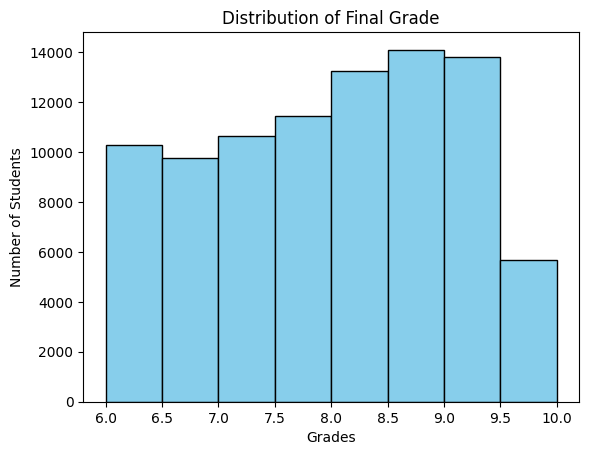

In [45]:
# Plot the distribution of grades using a histogram
grades = merged_data['Medie']
plt.hist(grades, bins=8, color='skyblue', edgecolor='black')
 
# Add labels and title
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grade')
 
# Show the plot
plt.show()

In [46]:
student = {
    'Sex': 'F',
    'Specializare': 'Științe ale Naturii',
    'Profil': 'Real',
    'Fileira': 'Tehnologică',
    'Mediu candidat': 'URBAN',
    'Judeţ': 'Tulcea',
    'Subiect ea': 'Limba română (REAL)',
    'Subiect ec': 'Matematică MATE-INFO',
    'Subiect ed': 'Fizică TEH',
    'Cod SIRUES': 1181411
}

In [47]:
student = {
    'Sex': 'M',
    'Specializare': 'Filologie',
    'Profil': 'Uman',
    'Fileira': 'Teoretică',
    'Mediu candidat': 'URBAN',
    'Judeţ': 'Alba',
    'Subiect ea': 'Limba română (UMAN)',
    'Subiect ec': 'Istorie',
    'Subiect ed': 'Geografie',
    'Cod SIRUES': 958099
}

In [48]:
student_df = pd.DataFrame([student])
[[ea, ec, ed]] = predict_grades(student_df)

student_df['NOTA_EA'] = ea
student_df['NOTA_EC'] = ec
student_df['NOTA_ED'] = ed

print(ea)
print(ec)
print(ed)

print("\n\n")

student_engineering, student_computer_science, student_social_studies, student_law, student_medicine, student_economics = grade_cluster(student_df)

criteria = {
	'engineering' : student_engineering,
	'computer_science' : student_computer_science,
	'social_studies' : student_social_studies,
	'law' : student_law,
	'medicine' : student_medicine,
	'economics' : student_economics,
}

for subject_name, subject in criteria.items():

	if (subject.sum() == 1):
		print(subject_name)

6.690402380952378
7.239357142857141
8.426162896825396



